<a href="https://colab.research.google.com/github/Eduardo-Rivera98/Final-Project-Fundus-Analysis/blob/main/Model_age_macular_degen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import load
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x=load('drive/MyDrive/x.npy')

In [ ]:
y=load('y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 1))),
model.add(layers.MaxPooling2D(2, 2)),
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Flatten()),
model.add(layer.Dropout(0.2)),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=20,verbose=1,shuffle = True, validation_data=(x_test,y_test))

Epoch 1/20
312/312 [==============================] - 299s 954ms/step - loss: 0.6779 - accuracy: 0.5767 - val_loss: 0.6584 - val_accuracy: 0.6112
Epoch 2/20
312/312 [==============================] - 300s 962ms/step - loss: 0.6318 - accuracy: 0.6346 - val_loss: 0.5690 - val_accuracy: 0.7215
Epoch 3/20
312/312 [==============================] - 300s 961ms/step - loss: 0.4747 - accuracy: 0.7710 - val_loss: 0.3835 - val_accuracy: 0.8162
Epoch 4/20
312/312 [==============================] - 297s 953ms/step - loss: 0.2746 - accuracy: 0.8894 - val_loss: 0.1969 - val_accuracy: 0.9322
Epoch 5/20
312/312 [==============================] - 298s 955ms/step - loss: 0.1259 - accuracy: 0.9551 - val_loss: 0.1390 - val_accuracy: 0.9571
Epoch 6/20
312/312 [==============================] - 297s 953ms/step - loss: 0.0767 - accuracy: 0.9751 - val_loss: 0.1112 - val_accuracy: 0.9691
Epoch 7/20
312/312 [==============================] - 297s 952ms/step - loss: 0.0465 - accuracy: 0.9885 - val_loss: 0.0894 -

In [ ]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1231
           1       0.98      1.00      0.99      1261

    accuracy                           0.99      2492
   macro avg       0.99      0.99      0.99      2492
weighted avg       0.99      0.99      0.99      2492



In [ ]:
precision_score(
y_test,
y_pred)

0.9820872274143302

(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f364d167250>)

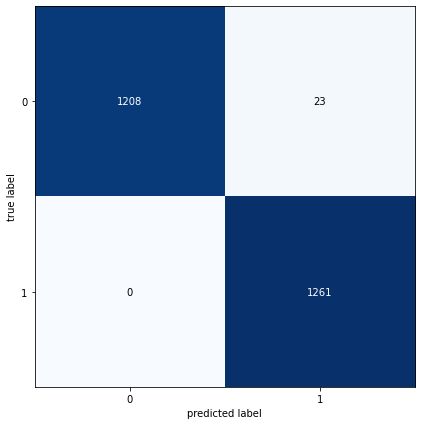

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7))

In [ ]:
model.save('drive/MyDrive/my_model_Age_macular_degen.h5')

In [ ]:
drive.flush_and_unmount()